# Exercise 12-1: Another analysis of the Polling data

## Get the data

In [1]:
# imports for data manipulation
import pandas as pd

# imports for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in csv
filename = 'president_polls_2016.csv'
df = pd.read_csv(filename)

In [3]:
# call the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [4]:
df

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,New Hampshire,7/9/2016,7/18/2016,University of New Hampshire,B+,...,40.24983,43.04717,6.924110,NaN,NaN,https://cola.unh.edu/sites/cola.unh.edu/files/...,44650,68189,7/21/16,09:14:14 8 Nov 2016
12620,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,10/21/2016,11/2/2016,Ipsos,A-,...,46.54218,38.96884,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,48259,75560,11/3/16,09:14:14 8 Nov 2016
12621,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,New York,8/7/2016,8/10/2016,Siena College,A,...,53.83622,32.47939,3.881193,NaN,NaN,https://www.siena.edu/assets/files/news/SNY081...,44852,68743,8/15/16,09:14:14 8 Nov 2016
12622,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,49.57558,39.96954,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,09:14:14 8 Nov 2016


## Clean the data

In [5]:
# drop unecessary columns
df = df.drop(columns=['rawpoll_johnson','adjpoll_johnson','adjpoll_mcmullin','rawpoll_mcmullin','branch', 'type', 'matchup', 'forecastdate', 'startdate', 'pollster', 'population', 'multiversions', 'url', 'createddate', 'timestamp'])



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cycle            12624 non-null  int64  
 1   state            12624 non-null  object 
 2   enddate          12624 non-null  object 
 3   grade            11337 non-null  object 
 4   samplesize       12621 non-null  float64
 5   poll_wt          12624 non-null  float64
 6   rawpoll_clinton  12624 non-null  float64
 7   rawpoll_trump    12624 non-null  float64
 8   adjpoll_clinton  12624 non-null  float64
 9   adjpoll_trump    12624 non-null  float64
 10  poll_id          12624 non-null  int64  
 11  question_id      12624 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.2+ MB


In [7]:
# add the type column that determines if the poll is a national or state poll
# Define a custom function to determine the type based on other columns
def determine_type(row):
    if row['state'] == 'U.S.':
        return 'national'
    else:
        return 'state'

# Apply the custom function to create the new 'type' column
df['type'] = df.apply(determine_type, axis=1)


In [8]:
df.type.value_counts()

type
state       9306
national    3318
Name: count, dtype: int64

In [9]:
# drop all rows except the ones that are for national polls
# Filter the DataFrame to keep only rows for national polls
df = df[df['type'] == 'national']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3318 entries, 0 to 12569
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cycle            3318 non-null   int64  
 1   state            3318 non-null   object 
 2   enddate          3318 non-null   object 
 3   grade            2454 non-null   object 
 4   samplesize       3318 non-null   float64
 5   poll_wt          3318 non-null   float64
 6   rawpoll_clinton  3318 non-null   float64
 7   rawpoll_trump    3318 non-null   float64
 8   adjpoll_clinton  3318 non-null   float64
 9   adjpoll_trump    3318 non-null   float64
 10  poll_id          3318 non-null   int64  
 11  question_id      3318 non-null   int64  
 12  type             3318 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 362.9+ KB


In [11]:
# drop rows with missing values
# Dropping rows with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 0 to 12462
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cycle            2454 non-null   int64  
 1   state            2454 non-null   object 
 2   enddate          2454 non-null   object 
 3   grade            2454 non-null   object 
 4   samplesize       2454 non-null   float64
 5   poll_wt          2454 non-null   float64
 6   rawpoll_clinton  2454 non-null   float64
 7   rawpoll_trump    2454 non-null   float64
 8   adjpoll_clinton  2454 non-null   float64
 9   adjpoll_trump    2454 non-null   float64
 10  poll_id          2454 non-null   int64  
 11  question_id      2454 non-null   int64  
 12  type             2454 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 268.4+ KB


In [12]:
# convert the enddate column to the datetime type

df['enddate'] = pd.to_datetime(df['enddate'])


In [13]:
# display the first five rows
df.head()

,cycle,state,enddate,grade,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,poll_id,question_id,type
0,2016,U.S.,2016-11-06,A+,2220.0,8.720654,47.00,43.00,45.20163,41.72430,48630,76192,national
1,2016,U.S.,2016-11-07,B,26574.0,7.628472,38.03,35.69,43.34557,41.21439,48847,76443,national
2,2016,U.S.,2016-11-06,A-,2195.0,6.424334,42.00,39.00,42.02638,38.81620,48922,76636,national
3,2016,U.S.,2016-11-07,B,3677.0,6.087135,45.00,41.00,45.65676,40.92004,48687,76262,national
4,2016,U.S.,2016-11-06,B-,16639.0,5.316449,47.00,43.00,46.84089,42.33184,48848,76444,national


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 0 to 12462
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cycle            2454 non-null   int64         
 1   state            2454 non-null   object        
 2   enddate          2454 non-null   datetime64[ns]
 3   grade            2454 non-null   object        
 4   samplesize       2454 non-null   float64       
 5   poll_wt          2454 non-null   float64       
 6   rawpoll_clinton  2454 non-null   float64       
 7   rawpoll_trump    2454 non-null   float64       
 8   adjpoll_clinton  2454 non-null   float64       
 9   adjpoll_trump    2454 non-null   float64       
 10  poll_id          2454 non-null   int64         
 11  question_id      2454 non-null   int64         
 12  type             2454 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 268.4+ KB


## Prepare and analyze the data

In [15]:
# get the value counts for the grade column
df.grade.value_counts()

grade
A-    1215
C+     546
B      162
C-     126
A+     114
B+     105
B-      96
A       87
C        3
Name: count, dtype: int64

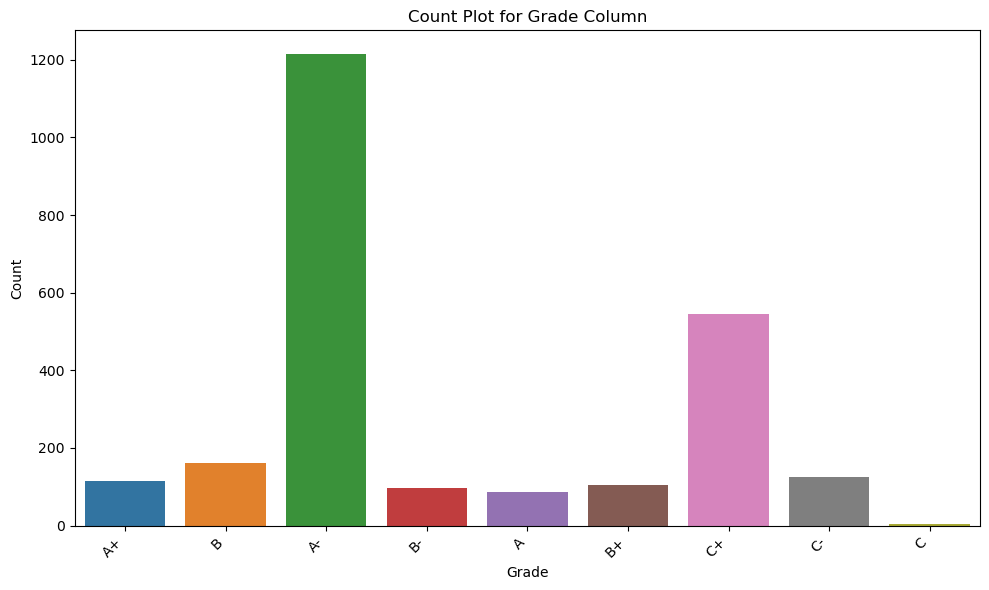

In [23]:
# create a count plot for the grade column

plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x='grade')

# Adding labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Count Plot for Grade Column')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.tight_layout()
plt.show()



In [24]:
# add a column named grade_letter that stores the grade letter only without the + or -

df['grade_letter'] = df['grade'].str.replace('[+-]', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 0 to 12462
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cycle            2454 non-null   int64         
 1   state            2454 non-null   object        
 2   enddate          2454 non-null   datetime64[ns]
 3   grade            2454 non-null   object        
 4   samplesize       2454 non-null   float64       
 5   poll_wt          2454 non-null   float64       
 6   rawpoll_clinton  2454 non-null   float64       
 7   rawpoll_trump    2454 non-null   float64       
 8   adjpoll_clinton  2454 non-null   float64       
 9   adjpoll_trump    2454 non-null   float64       
 10  poll_id          2454 non-null   int64         
 11  question_id      2454 non-null   int64         
 12  type             2454 non-null   object        
 13  grade_letter     2454 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), 

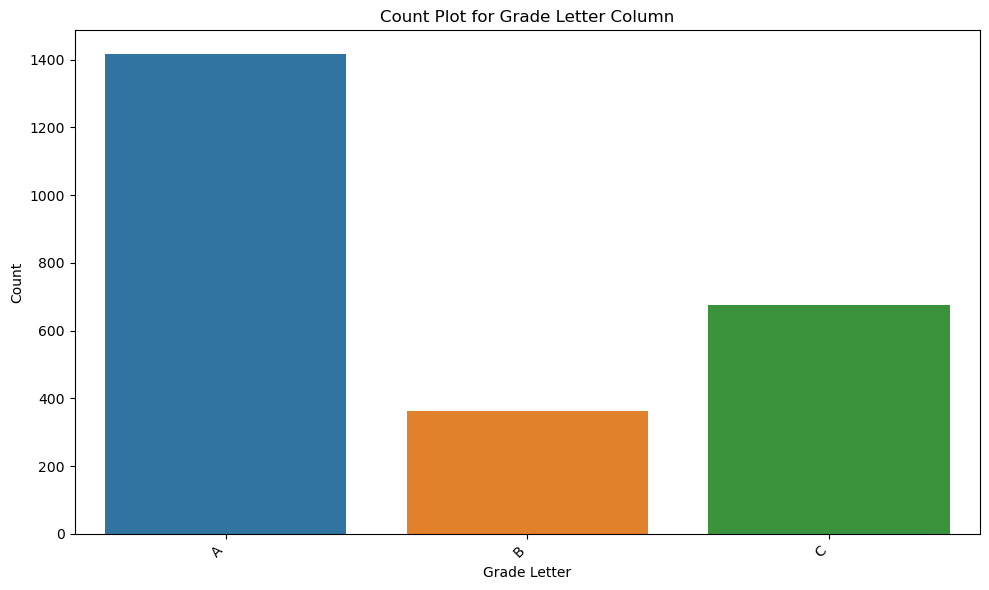

In [29]:
# create a count plot for the grade_Letter column

plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x='grade_letter')

# Adding labels and title
plt.xlabel('Grade Letter')
plt.ylabel('Count')
plt.title('Count Plot for Grade Letter Column')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.tight_layout()
plt.show()


In [30]:
# melt the rawpoll_clinton and rawpoll_trump columns into the candidate and percent columns



# Melt the 'rawpoll_clinton' and 'rawpoll_trump' columns into the 'candidate' and 'percent' columns
melted_df = pd.melt(df, id_vars=['enddate'], value_vars=['rawpoll_clinton', 'rawpoll_trump'], var_name='candidate', value_name='percent')


In [31]:
melted_df

,enddate,candidate,percent
0,2016-11-06,rawpoll_clinton,47.00
1,2016-11-07,rawpoll_clinton,38.03
2,2016-11-06,rawpoll_clinton,42.00
3,2016-11-07,rawpoll_clinton,45.00
4,2016-11-06,rawpoll_clinton,47.00
...,...,...,...
4903,2016-01-02,rawpoll_trump,35.70
4904,2015-12-19,rawpoll_trump,32.10
4905,2015-12-18,rawpoll_trump,30.60
4906,2016-01-01,rawpoll_trump,41.00


In [32]:
# modify the candidate column so it stores 'Clinton' or 'Trump'

melted_df['candidate'] = melted_df['candidate'].replace({'rawpoll_clinton': 'Clinton', 'rawpoll_trump': 'Trump'})



In [33]:
# display the first five rows
melted_df.head()


,enddate,candidate,percent
0,2016-11-06,Clinton,47.00
1,2016-11-07,Clinton,38.03
2,2016-11-06,Clinton,42.00
3,2016-11-07,Clinton,45.00
4,2016-11-06,Clinton,47.00


In [36]:
# Merge the melted DataFrame with the 'grade_letter' column from the original DataFrame
melted_df = melted_df.merge(df[['grade_letter']], left_index=True, right_index=True)


## Plot the data

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


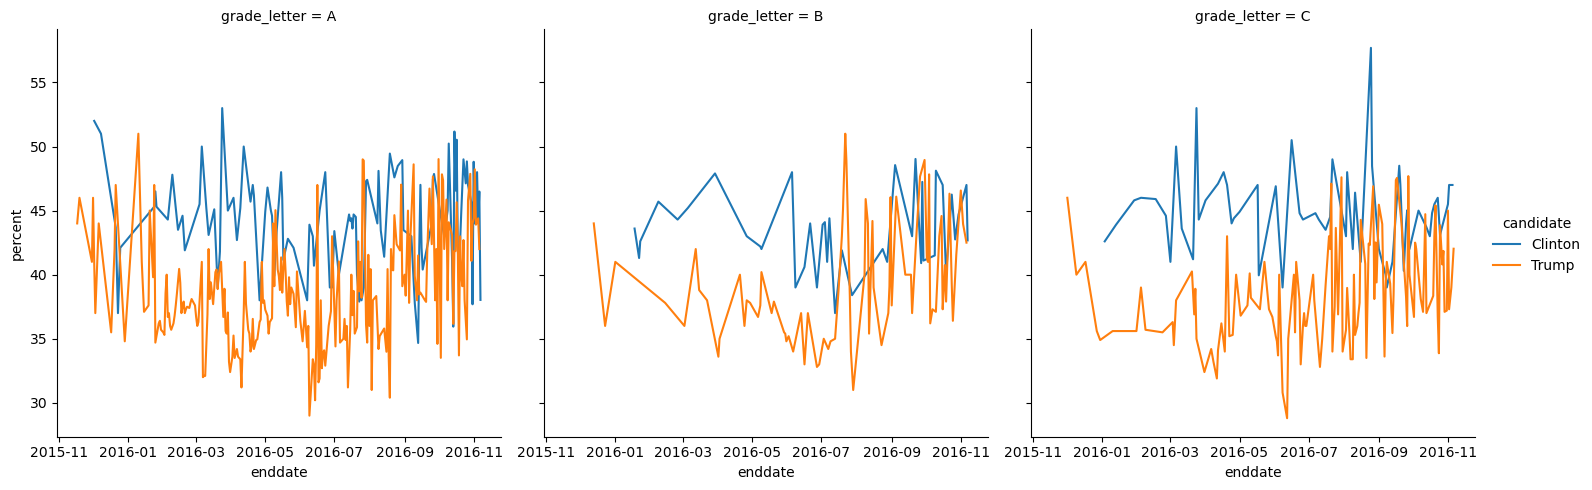

In [38]:
# create a line plot
sns.relplot(data=melted_df, kind='line', errorbar=None, x='enddate', y='percent', hue='candidate', col='grade_letter')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/6q/0n2ckzv123v3y8qcqf864bp80000gn/T/ipykernel_60238/2116584602.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


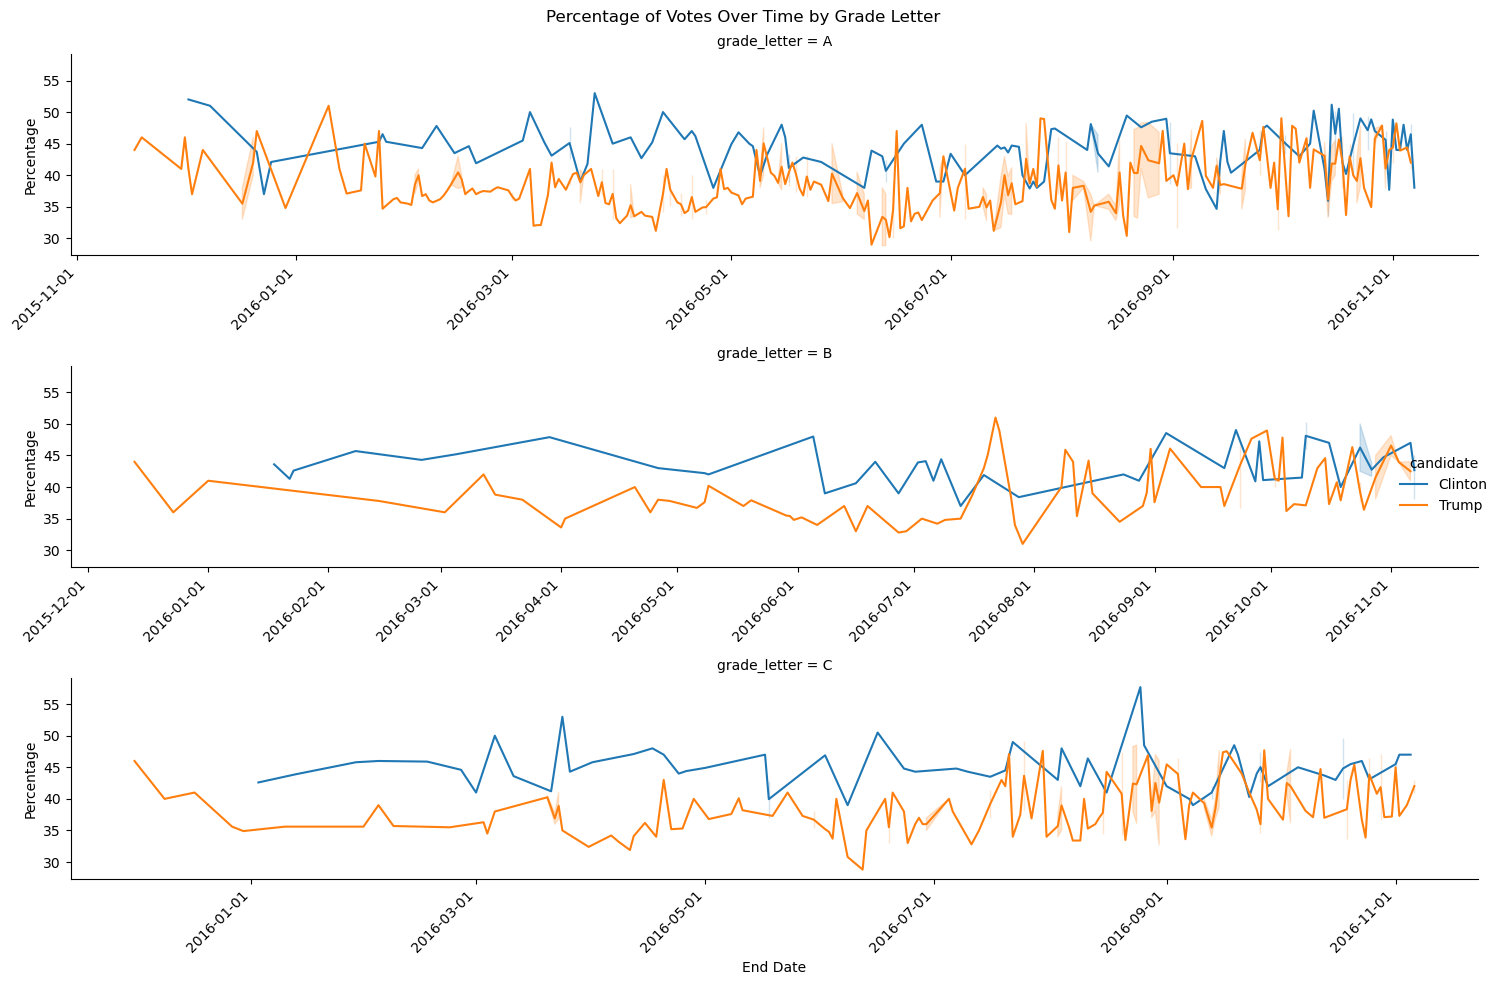

In [43]:
# make the subplots easier to read

# Create a line plot
g = sns.relplot(data=melted_df, kind='line', x='enddate', y='percent', hue='candidate', col='grade_letter', col_wrap=1, facet_kws=dict(sharex=False))

# Adjusting the size of the plot
g.fig.set_size_inches(15, 10)

# Adding labels and title
g.set_axis_labels('End Date', 'Percentage')
g.fig.suptitle('Percentage of Votes Over Time by Grade Letter')

# Rotating x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Adjusting legend position
g._legend.set_bbox_to_anchor((1, 0.5))

# Showing the plot
plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/6q/0n2ckzv123v3y8qcqf864bp80000gn/T/ipykernel_60238/4111473015.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


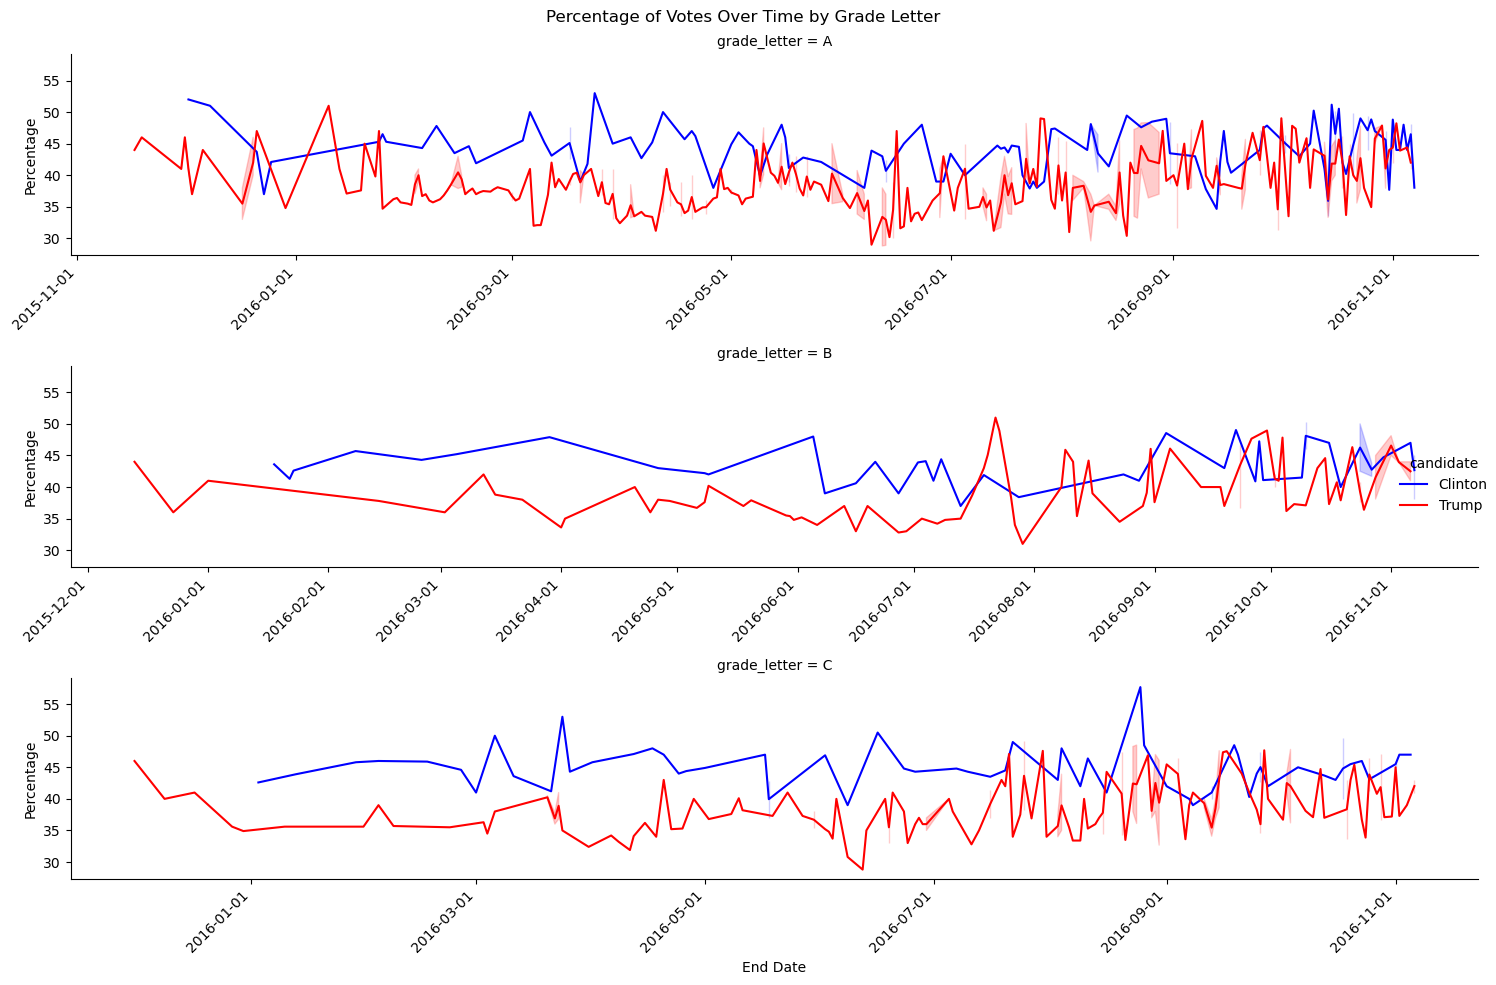

In [45]:
# enhance the plot by using blue for Clinton and red for Trump

# Define custom color palette
colors = {'Clinton': 'blue', 'Trump': 'red'}

# Create a line plot with custom color palette
g = sns.relplot(data=melted_df, kind='line', x='enddate', y='percent', hue='candidate', col='grade_letter', col_wrap=1, facet_kws=dict(sharex=False), palette=colors)

# Adjusting the size of the plot
g.fig.set_size_inches(15, 10)

# Adding labels and title
g.set_axis_labels('End Date', 'Percentage')
g.fig.suptitle('Percentage of Votes Over Time by Grade Letter')

# Rotating x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Adjusting legend position
g._legend.set_bbox_to_anchor((1, 0.5))

# Showing the plot
plt.tight_layout()
plt.show()
